In [67]:
#3.2.[a]-1
import numpy as np
def clgs(A):
    (m,n) = A.shape
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros([n,n])
    for j in range(0,n):
        for i in range(0,j):
            R[i,j] = np.transpose(Q[:,i])@A[:,j]
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j],ord = 2)
        Q[:,j] = V[:,j]/R[j,j]
        
    return [Q,R]

In [68]:
#clgs 확인
import numpy as np
A = np.array([[1.,1.,1.],[2.,1.,0.],[5.,1.,3.]])
clgs(A)

[array([[ 0.18257419,  0.78772636,  0.58834841],
        [ 0.36514837,  0.50128041, -0.78446454],
        [ 0.91287093, -0.35805744,  0.19611614]]),
 array([[ 5.47722558,  1.46059349,  2.92118697],
        [ 0.        ,  0.93094934, -0.28644595],
        [ 0.        ,  0.        ,  1.17669681]])]

In [69]:
#3.2.[a]-2
import numpy as np
def mgs(A):
    (m,n) = A.shape
    Q = A.copy()
    R = np.zeros([n,n])
    for i in range(0,n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j] = np.transpose(Q[:,i])@Q[:,j]
            Q[:,j] = Q[:,j] - Q[:,i]*R[i,j]
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1],ord=2)
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return [Q,R] 

In [70]:
#mgs 확인
import numpy as np
A = np.array([[1.,1.,1.],[2.,1.,0.],[5.,1.,3.]])
mgs(A)

[array([[ 0.18257419,  0.78772636,  0.58834841],
        [ 0.36514837,  0.50128041, -0.78446454],
        [ 0.91287093, -0.35805744,  0.19611614]]),
 array([[ 5.47722558,  1.46059349,  2.92118697],
        [ 0.        ,  0.93094934, -0.28644595],
        [ 0.        ,  0.        ,  1.17669681]])]

In [71]:
#3.2.[a]-3
import numpy as np
def qrhouse(A):
    (m,n) = A.shape
    R = A.copy()
    V = np.zeros([m,n])
    for k in range(0,min(m-1,n)):
        x = R[k:m,k].copy()
        x = x.reshape((m-k,1))
        v = x+np.sign(x[0])*np.linalg.norm(x,ord = 2)*np.eye(m-k,1)
        V[k:m,k] = v.reshape(m-k)
        R[k:m,k:n] = R[k:m,k:n] -(2*v)@(np.transpose(v)@R[k:m,k:n])/(np.transpose(v)@v)
    R = np.triu(R[0:n,0:n])
    return [V,R]

In [72]:
#3.2.[a]-4
import numpy as np
def formQ(V):
    (m,n) = V.shape
    Q = np.eye(m,n)
    for j in range(min(m-2,n-1),-1,-1):
        v = V[:,j].copy()
        v = v.reshape((m,1))
        Q = Q - (2*v)@(np.transpose(v)@Q)/(np.transpose(v)@v)
    return Q

In [73]:
#qrhouse와 formQ확인
import numpy as np
A = np.array([[1.,1.,1.],[2.,1.,0.],[5.,1.,3.]])
[V,R] = qrhouse(A)
Q = formQ(V)
print(Q)
print(R)
print(Q@R)

[[-0.18257419 -0.78772636 -0.58834841]
 [-0.36514837 -0.50128041  0.78446454]
 [-0.91287093  0.35805744 -0.19611614]]
[[-5.47722558 -1.46059349 -2.92118697]
 [ 0.         -0.93094934  0.28644595]
 [ 0.          0.         -1.17669681]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00 -4.63641405e-16]
 [ 5.00000000e+00  1.00000000e+00  3.00000000e+00]]


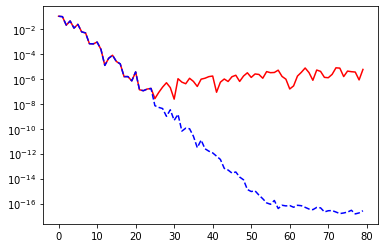

In [74]:
#3.2.[a]-5 : modified가 더 stable
import numpy as np
import matplotlib.pyplot as plt
U, X = np.linalg.qr(np.random.randn(80,80))
V, X = np.linalg.qr(np.random.randn(80,80))
S = np.zeros([80,80])
for j in range(0,80):
    S[j,j] = 2**(-j)
A = U@S@V
[Qc,Rc] = clgs(A)
[Qm,Rm] = mgs(A)

s = []
rc = []
rm = []
for j in range(0,80):
    s.append(S[j,j])
    rc.append(Rc[j,j])
    rm.append(Rm[j,j])

plt.semilogy(range(80),rc,'r')
plt.semilogy(range(80),rm,'b--')

In [75]:
#3.2.[b] : householder가 더 stable
A = np.array([[.70000,.70711],[.70001, .70711]])
[Qm,Rm] = mgs(A)
[V,R] = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.transpose(Q)@Q - np.eye(2,2)))
print(np.linalg.norm(np.transpose(Qm)@Qm - np.eye(2,2)))

3.451616545114987e-16
3.254726094493924e-11


In [128]:
#3.3
import numpy as np

def qrgr(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    R=A_Mat
    Q=np.eye(m,m)
    l=0
    G=[]
    for j in range(0,n):
        for i in range(m-1,j,-1):
            c=-A_Mat[i-1,j]/np.sqrt(A_Mat[i-1,j]**2+A_Mat[i,j]**2)
            s=A_Mat[i,j]/np.sqrt(A_Mat[i-1,j]**2+A_Mat[i,j]**2)
            Q[i-1:i+1,j:j+2]=np.array([[c,-s],[s,c]])@Q[i-1:i+1,j:j+2]
            G.append(Q)
            l=l+1
            Q=np.eye(m,m)
            R[i-1:i+1,j:n]=np.array([[c,-s],[s,c]])@R[i-1:i+1,j:n]
    Q=np.eye(m,m)
    for k in range(0,l):
        Q=np.transpose(np.array(G[l-i-1]))@Q
    return [Q,R]


In [129]:
#qrgr(기븐스회전 이용한 qr분해) 확인
import numpy as np
A = 100*np.random.randn(4,3)
[Qgr, Rgr] = qrgr(A)
[Q,R] = np.linalg.qr(A)
print(Rgr)
print(R)

[[-2.08118688e+02  4.01687241e+01 -1.02434271e+02]
 [-8.88178420e-16 -6.42410471e+01 -1.08736880e+02]
 [ 0.00000000e+00  0.00000000e+00 -1.03569267e+02]
 [ 1.42108547e-14  0.00000000e+00  0.00000000e+00]]
[[-208.11868751   40.16872407 -102.43427144]
 [   0.          -64.24104706 -108.73688011]
 [   0.            0.         -103.56926721]]


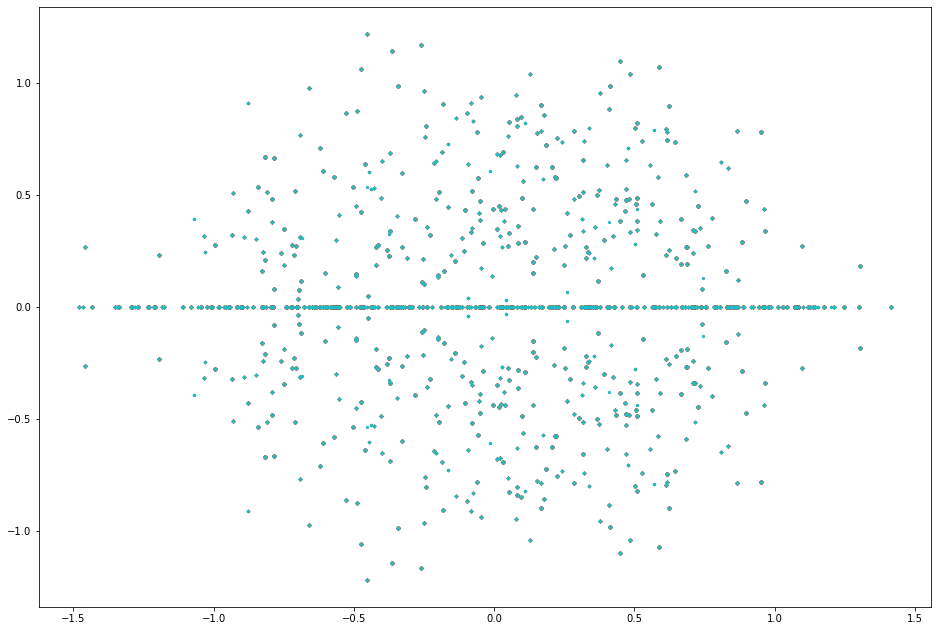

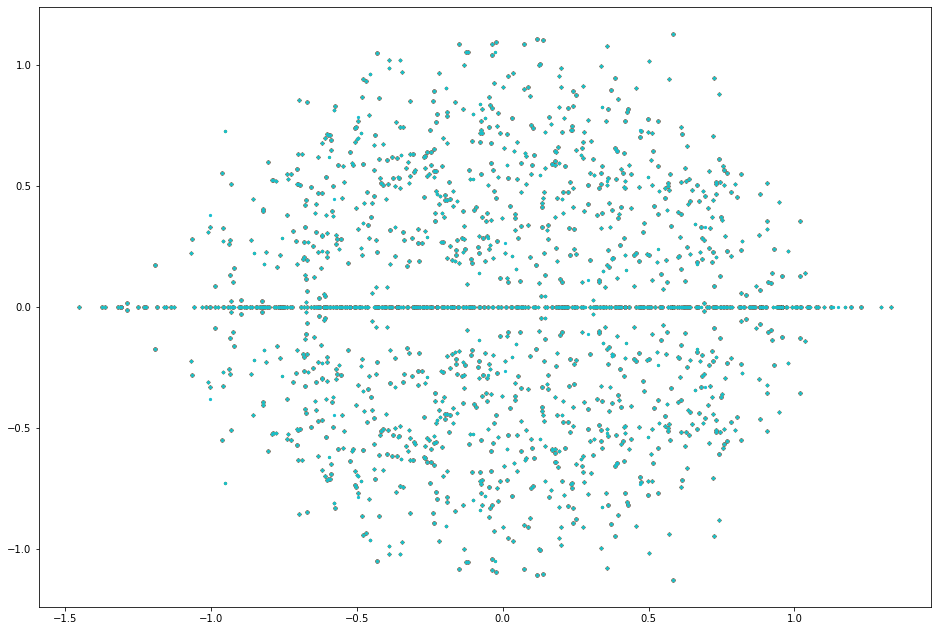

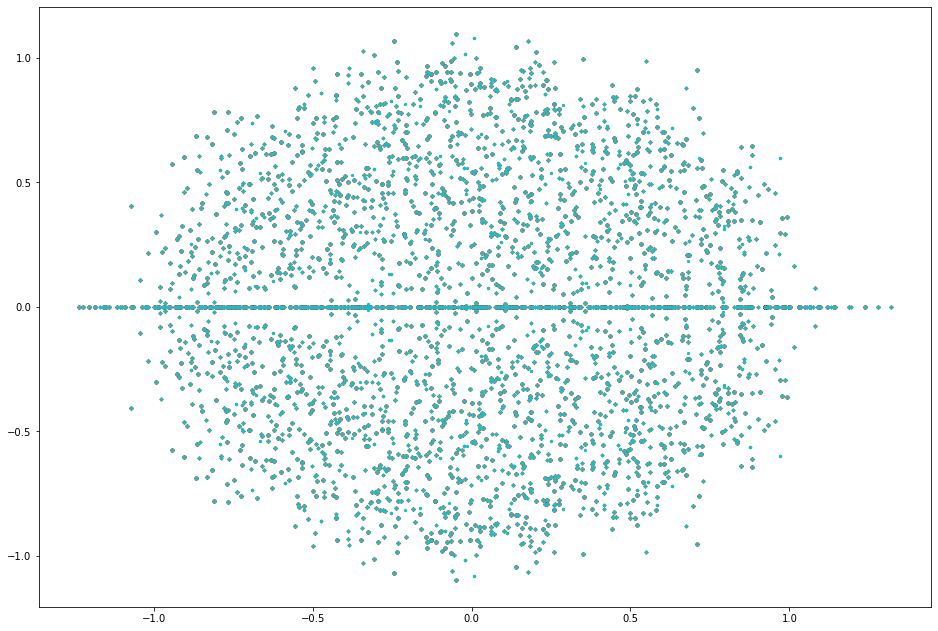

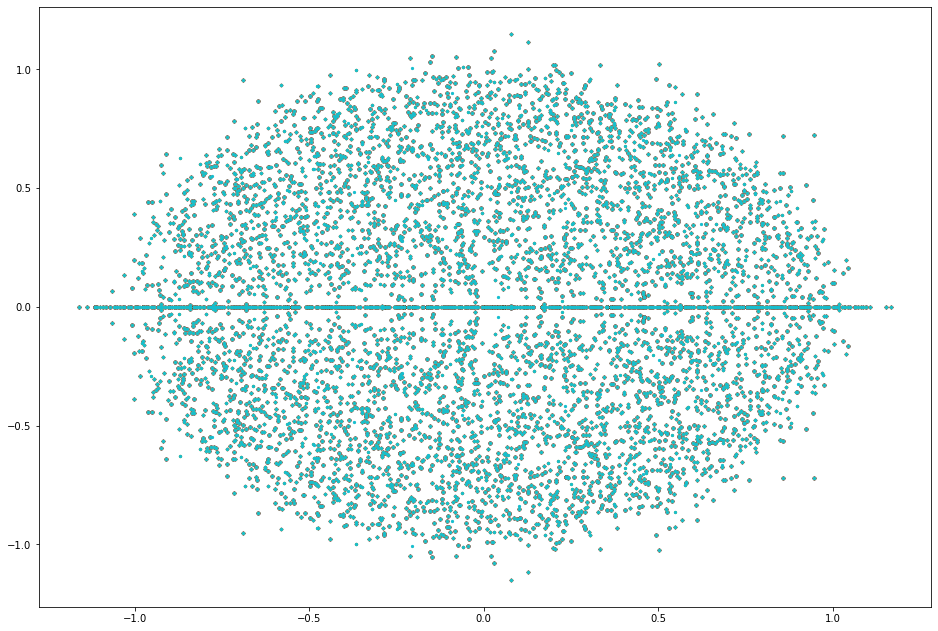

In [78]:
#4.3.[a]-1
import numpy as np
import matplotlib.pyplot as plt
for n in range(3,7):
    m = 2**n
    l = n - 3
    eiv_A = []
    real = []
    imag = []
    plt.figure(figsize=(16, 64))
    plt.subplot(511+l)
    for j in range(0,100):
        A = np.random.randn(m,m)/np.sqrt(m)
        ei_A = np.linalg.eigvals(A)
        for i in range(0,len(ei_A)):
            real.append(ei_A[i].real)
            imag.append(ei_A[i].imag)
        plt.scatter(real,imag, s= 5)

In [13]:
#4.3.[a]-2
#rho(A)는 1에 가까운 값이 나오지만 m 이증가한다고해서 1에 더 가까워지는 것으로 나타나진 않는다.
import numpy as np
print("  m    rho(A)")
for n in range(3,7):
    m = 2**n
    A = np.random.randn(m,m)/np.sqrt(m)
    ei_A = np.linalg.eigvals(A)
    ab = []
    for i in range(0,len(ei_A)):
        ab.append(np.sqrt(ei_A[i].real**2 + ei_A[i].imag**2))
    print("%3d  %14.10f \n" %(m,max(ab)))

  m    rho(A)
  8    0.9186699026 

 16    1.1221285359 

 32    0.9925445975 

 64    0.9663514879 



In [14]:
#4.3.[b]-1
import numpy as np
print("  m     2-norm")
for n in range(3,7):
    m = 2**n
    A = np.random.randn(m,m)/np.sqrt(m)
    (U,S,Vh) = np.linalg.svd(A)
    print("%3d   %14.10f \n"%(m,max(S)))

  m     2-norm
  8     1.6438636845 

 16     1.6352913333 

 32     1.9621083199 

 64     1.9299774845 



In [15]:
#4.3.[b]-2
#m이 커져도 A의 norm과 rho(A)의 차이는 계속 1주변의 값이 나올뿐 1에 가까워지지 않는다.
import numpy as np
print("  m     difference")
for n in range(3,10):
    m = 2**n
    A = np.random.randn(m,m)/np.sqrt(m)
    ei_A = np.linalg.eigvals(A)
    ab = []
    for i in range(0,len(ei_A)):
        ab.append(np.sqrt(ei_A[i].real**2 + ei_A[i].imag**2))
    (U,S,Vh) = np.linalg.svd(A)
    print("%3d   %14.10f" %(m, max(S)-max(ab)))

  m     difference
  8     0.5914186562
 16     0.6827740988
 32     0.9037485867
 64     0.8235194694
128     0.9463168780
256     0.9016697389
512     0.9850319815


In [16]:
#4.3.[c]
#m이 커지면 sig_min값은 감소한다.
import numpy as np
print("  m   criterion   Probability(%)")
for n in range(3,7):
    m = 2**n
    sig_min = []
    for i in range(0,100):
        A = np.random.randn(m,m)/np.sqrt(m)
        (U,S,Vh) = np.linalg.svd(A)
        sig_min.append(min(S))
    for j in range(-1,-4,-1):
        P = np.array(sig_min, dtype = 'float32')
        P = np.where(P <= 2**j, 1, 0)
        print("%3d   %4.3f        %3d \n" %(m,2**j,sum(P)))

  m   criterion   Probability(%)
  8   0.500        100 

  8   0.250        100 

  8   0.125         80 

 16   0.500        100 

 16   0.250        100 

 16   0.125         96 

 32   0.500        100 

 32   0.250        100 

 32   0.125        100 

 64   0.500        100 

 64   0.250        100 

 64   0.125        100 



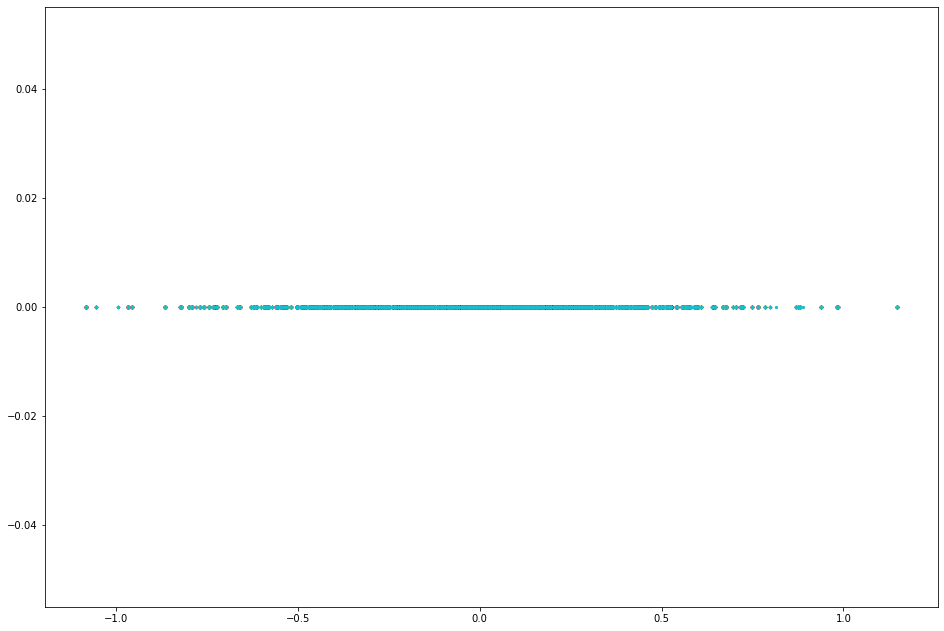

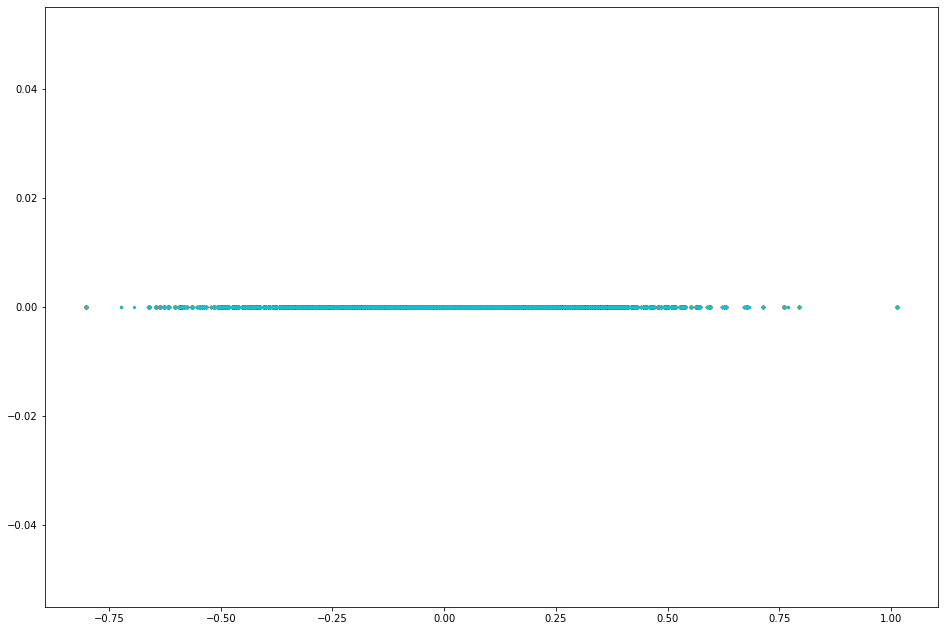

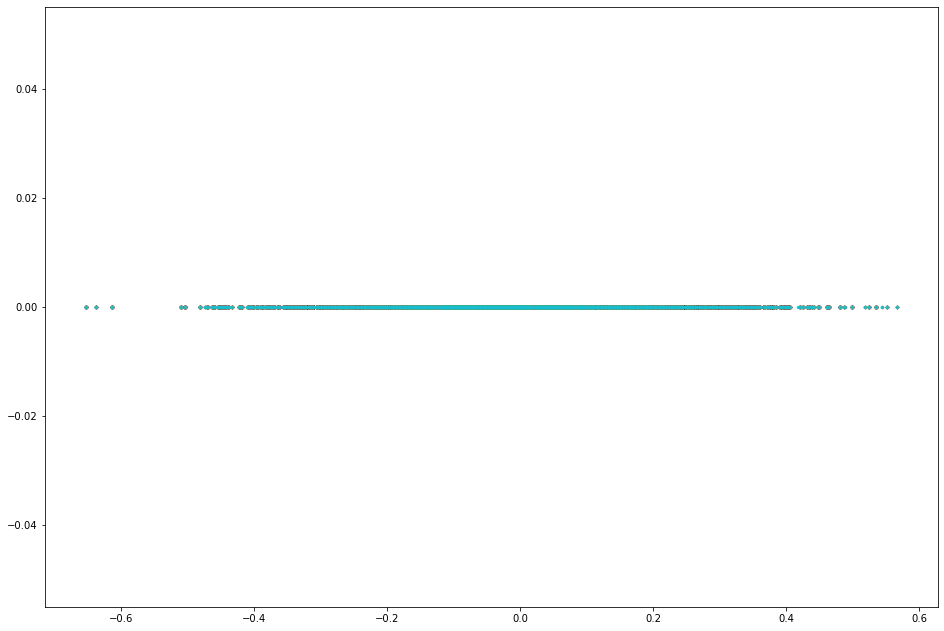

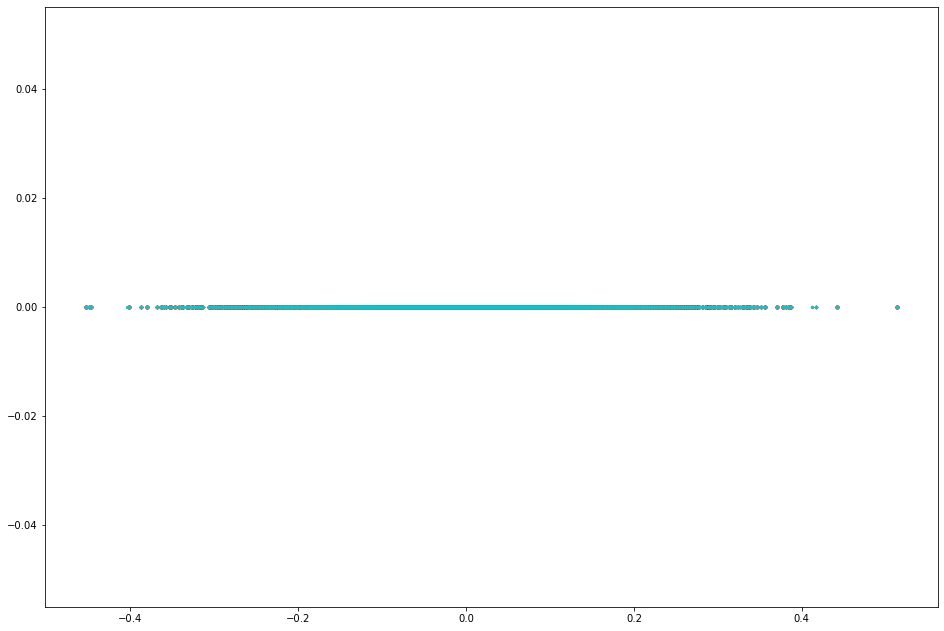

In [17]:
#4.3.[d] - [a] -1
import numpy as np
import matplotlib.pyplot as plt
for n in range(3,7):
    m = 2**n
    l = n - 3
    eiv_A = []
    real = []
    imag = []
    plt.figure(figsize=(16, 64))
    plt.subplot(511+l)
    for j in range(0,100):
        A = np.triu(np.random.randn(m,m))/np.sqrt(m)
        ei_A = np.linalg.eigvals(A)
        for i in range(0,len(ei_A)):
            real.append(ei_A[i].real)
            imag.append(ei_A[i].imag)
        plt.scatter(real,imag, s= 5)

In [5]:
#4.3.[d]-[a]-2
#m이 커질수록 rho(A) 값은 감소한다.
import numpy as np
print("  m    rho(A)")
for n in range(3,7):
    m = 2**n
    A = np.triu(np.random.randn(m,m))/np.sqrt(m)
    ei_A = np.linalg.eigvals(A)
    ab = []
    for i in range(0,len(ei_A)):
        ab.append(np.sqrt(ei_A[i].real**2 + ei_A[i].imag**2))
    print("%3d  %14.10f \n" %(m,max(ab)))

  m    rho(A)
  8    0.5740496229 

 16    0.3985141558 

 32    0.4615821882 

 64    0.4254584299 



In [6]:
#4.3.[d]-[b]-1
import numpy as np
print("  m     2-norm")
for n in range(3,7):
    m = 2**n
    A = np.triu(np.random.randn(m,m))/np.sqrt(m)
    (U,S,Vh) = np.linalg.svd(A)
    print("%3d   %14.10f \n"%(m,max(S)))

  m     2-norm
  8     1.8091735396 

 16     1.4997574183 

 32     1.6192406664 

 64     1.6690411023 



In [8]:
#4.3.[d]-[b]-2
#m이 커질수록 A의 norm과 rho(A)의 차이는 증가한다.
import numpy as np
print("  m     difference")
for n in range(3,7):
    m = 2**n
    A = np.triu(np.random.randn(m,m))/np.sqrt(m)
    ei_A = np.linalg.eigvals(A)
    ab = []
    for i in range(0,len(ei_A)):
        ab.append(np.sqrt(ei_A[i].real**2 + ei_A[i].imag**2))
    (U,S,Vh) = np.linalg.svd(A)
    print("%3d   %14.10f" %(m, max(S)-max(ab)))

  m     difference
  8     0.5997260592
 16     0.8392488291
 32     1.1198972766
 64     1.2893573339


In [10]:
#4.3.[d]-[c]
#m이 커질수록 sig_min값은 감소한다.
import numpy as np

print("  m   criterion   Probability(%)")
for n in range(3,7):
    m = 2**n
    sig_min = []
    for i in range(0,100):
        A = np.triu(np.random.randn(m,m))/np.sqrt(m)
        (U,S,Vh) = np.linalg.svd(A)
        sig_min.append(min(S))
    for j in range(-1,-7,-1):
        P = np.array(sig_min, dtype = 'float32')
        P = np.where(P <= 2**j, 1, 0)
        print("%3d   %4.3f        %3d \n" %(m,2**j,sum(P)))

  m   criterion   Probability(%)
  8   0.500        100 

  8   0.250        100 

  8   0.125        100 

  8   0.062        100 

  8   0.031         99 

  8   0.016         95 

 16   0.500        100 

 16   0.250        100 

 16   0.125        100 

 16   0.062        100 

 16   0.031        100 

 16   0.016        100 

 32   0.500        100 

 32   0.250        100 

 32   0.125        100 

 32   0.062        100 

 32   0.031        100 

 32   0.016        100 

 64   0.500        100 

 64   0.250        100 

 64   0.125        100 

 64   0.062        100 

 64   0.031        100 

 64   0.016        100 



In [130]:
#4.6.[a]
import numpy as np

t = np.linspace(0,1)
A = np.fliplr(np.vander(t, N = 12))
b = np.cos(4*t)
x=[0,0,0,0,0,0]
(x[0], residuals, rank, sig) = np.linalg.lstsq(A,b, rcond=None)
print(x[0])

[ 1.00000000e+00 -4.22742747e-07 -7.99998124e+00 -3.18763179e-04
  1.06694308e+01 -1.38202867e-02 -5.64707563e+00 -7.53160186e-02
  1.69360696e+00  6.03211341e-03 -3.74241705e-01  8.80405764e-02]


In [131]:
#4.6.[b]
import numpy as np

(Q_mgs,R_mgs) = mgs(A)
print(Q_mgs.shape)
(x[1],residuals, rank, sig) = np.linalg.lstsq(R_mgs,np.transpose(Q_mgs)@b,rcond=None)
print(x[1])

(50, 12)
[ 1.00000000e+00 -2.67599308e-07 -7.99998732e+00 -2.26274661e-04
  1.06687050e+01 -1.04782875e-02 -5.65671261e+00 -5.74115968e-02
  1.67218798e+00  2.19701526e-02 -3.80952230e-01  8.92617936e-02]


In [132]:
#4.6.[c]
import numpy as np

(V_house, R_house) = qrhouse(A)
Q_house = formQ(V_house)
(x[2],residuals, rank, sig) = np.linalg.lstsq(R_house,np.transpose(Q_house)@b, rcond=None)

print(x[2])

[ 1.00000000e+00 -4.22743074e-07 -7.99998124e+00 -3.18763249e-04
  1.06694308e+01 -1.38202885e-02 -5.64707563e+00 -7.53160266e-02
  1.69360697e+00  6.03210693e-03 -3.74241703e-01  8.80405759e-02]


In [133]:
#4.6.[d]
import numpy as np

(Q_py, R_py) = np.linalg.qr(A)
(x[3],residuals, rank, sig) = np.linalg.lstsq(R_py,np.transpose(Q_py)@b, rcond=None)
print(x[3])

[ 1.00000000e+00 -4.22742760e-07 -7.99998124e+00 -3.18763193e-04
  1.06694308e+01 -1.38202872e-02 -5.64707563e+00 -7.53160213e-02
  1.69360696e+00  6.03211095e-03 -3.74241704e-01  8.80405762e-02]


In [134]:
#4.6.[e] Matlab에서만 가능한 문제인 것 같습니다.
import numpy as np


In [135]:
#4.6.[f]
import numpy as np

(U,S,Vh) = np.linalg.svd(A)
(m,n) = A.shape
S_t = np.zeros([n,m])
for i in range(0,min(m,n)):
    if S[i] != 0:
        S_t[i,i] = 1/S[i]
x[5] = np.transpose(Vh)@S_t@np.transpose(U)@b
print(x[5])

[ 1.00000000e+00 -4.22742779e-07 -7.99998124e+00 -3.18763206e-04
  1.06694308e+01 -1.38202875e-02 -5.64707563e+00 -7.53160220e-02
  1.69360696e+00  6.03211031e-03 -3.74241704e-01  8.80405763e-02]


In [ ]:
#4.6.[g]

#앞서 각 방법으로 구해 출력한 x값을 보면 mgs 즉 modified Gram-schmidt를 이용한 
#방법만 오차가 뚜렷하게 나타나고 다른 방법들은 오차를 크게 찾을수 없었습니다.